<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

# Problem Statement

Is there a bias between the ACT and SAT and what advice can we provide to the education board to help increase test scores?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

In its recently released 2020 National Profile Report, ACT reports that class of 2020 average ACT composite scores declined from 20.7 to 20.6, which represents the lowest composite score in 10 years. Similar results were seen in the recently released SAT 2020 Annual Report, where College Board reports a decrease in scores for the Class of 2020: SAT composite scores dropped from 1059 (Class of 2019) to 1051 (Class of 2020), with a 3-point decrease in Evidence-Based Reading & Writing (EBRW) from 531 to 528 and a 5-point decrease in Math from 528 to 523. 

source: https://www.academicapproach.com/act-sat-scores-declining-whats-next/

Test centers has been opening and closing over the years. Analysis to be conducted to determine if convenience of test centers actually do affect the test scores.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def cal_mean(x):
    return sum(x)/len(x)

In [2]:
cal_mean([1,2,3])

2.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Code:
def cal_sd(data):
    sum = 0
    cal_mean(data)
    for x in data:
        sum += ((x - cal_mean(data)) ** 2 )
    return (sum / len(data)) ** 0.5

In [4]:
cal_sd([1,2,3])

0.816496580927726

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
# Code:
def convert_str_to_float(x):
    special_char = '@_!#$%^&*()<>?/\|}{~:;[]'
    new_string = float(''.join(i for i in x if not i in special_char))
    return new_string

In [6]:
convert_str_to_float('50%')

50.0

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|sat_2017/sat_2018/sat_2019|Individual US States| 
|Participate17|float|sat_2017|Participation Rate in 2017|
|EBRW17|int|sat_2017|Evidence-Based Reading and Writing Scores for 2017|
|Math17|int|sat_2017|Math Scores for 2017|
|Total17|int|sat_2017|Total SAT Score for 2017|
|Participate18|float|sat_2018|Participation Rate in year 2018|
|EBRW18|int|sat_2018|Evidence-Based Reading and Writing Scores for 2018|
|Math18|int|sat_2018|Math Scores for 2018|
|Total18|int|sat_2018|Total SAT Score for 2018|
|Participate19|float|sat_2019|Participation Rate in year 2019|
|EBRW19|int|sat_2019|Evidence-Based Reading and Writing Scores for 2019|
|Math19|int|sat_2019|Math Scores for 2019|
|Total19|int|sat_2019|Total SAT Score for 2019|
|State Code|object|state1|2 Letters Code that represent each states|
|No. of SAT Test Centers|int|state1|Number of SAT test centers in each states|
|2016 - 2017 (No. of Graduates)|int|state1|Number of college graduates from 2016 - 2017|
|2017 - 2018 (No. of Graduates)|int|state1|Number of college graduates from 2017 - 2018|
|2018 - 2019 (No. of Graduates)|int|state1|Number of college graduates from 2018 - 2019|
|2019 - 2020 (No. of Graduates)|int|state1|Number of college graduates from 2019 - 2020|
|2017 (SAT Accessibility)|float|sat_17_18_19_access|Participation * Number of graduates / Number of test centers. The ratio of number of graduates who took SAT exams to 1 test center in 2017|
|2018 (SAT Accessibility)|float|sat_17_18_19_access|Participation * Number of graduates / Number of test centers. The ratio of number of graduates who took SAT exams to 1 test center in 2018|
|2019 (SAT Accessibility)|float|sat_17_18_19_access|Participation * Number of graduates / Number of test centers. The ratio of number of graduates who took SAT exams to 1 test center in 2019|


# Importing of Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as gobj

## Data Import and Cleaning

### 2017 SAT Data

In [8]:
sat_2017 = pd.read_csv('data/sat_2017.csv')

In [9]:
#Converting Participation to float and removing '%'
sat_2017_part = sat_2017['Participation'].str.replace('%','').astype('float')/100
sat_2017['Participation'] = sat_2017_part

In [10]:
#Renaming Columns
sat_2017.rename(columns = {'Participation': 'Participation17','Evidence-Based Reading and Writing': 'EBRW17', 'Math': 'Math17', 'Total': 'Total17'}, inplace = True)

In [11]:
#Check for missing values
sat_2017.isnull().sum()

State              0
Participation17    0
EBRW17             0
Math17             0
Total17            0
dtype: int64

In [12]:
#Check for abnormality 
sat_2017['EBRW17'].sort_values().head()

8     482
7     503
22    509
19    513
43    513
Name: EBRW17, dtype: int64

In [13]:
#Check for abnormality 
sat_2017['EBRW17'].sort_values().tail()

34    635
25    640
15    641
49    642
23    644
Name: EBRW17, dtype: int64

In [14]:
#Check for abnormality 
sat_2017['Math17'].sort_values().head()

20     52
8     468
7     492
12    493
22    495
Name: Math17, dtype: int64

In [15]:
#Check for abnormality 
sat_2017['Math17'].sort_values().tail()

16    628
25    631
15    635
49    649
23    651
Name: Math17, dtype: int64

In [16]:
#Check for abnormality 
sat_2017['Total17'].sort_values().head()

8      950
7      996
12    1005
22    1005
19    1012
Name: Total17, dtype: int64

In [17]:
#Check for abnormality 
sat_2017['Total17'].sort_values().tail()

16    1260
25    1271
15    1275
49    1291
23    1295
Name: Total17, dtype: int64

In [18]:
#Correcting Math17 for index 20 
sat_2017['Math17'] = sat_2017['Total17'] - sat_2017['EBRW17']

In [19]:
sat_2017

,State,Participation17,EBRW17,Math17,Total17
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1.00,530,511,1041
7,Delaware,1.00,503,493,996
8,District of Columbia,1.00,482,468,950
9,Florida,0.83,520,497,1017


### 2018 SAT Data

In [20]:
sat_2018 = pd.read_csv('data/sat_2018.csv')

In [21]:
#Converting Participation to float and removing '%'
sat_2018_part = sat_2018['Participation'].str.replace('%','').astype('float')/100
sat_2018['Participation'] = sat_2018_part

In [22]:
#Renaming colmuns
sat_2018.rename(columns = {'Participation': 'Participation18','Evidence-Based Reading and Writing': 'EBRW18', 'Math': 'Math18', 'Total': 'Total18'}, inplace = True)

In [23]:
sat_2018.head()

,State,Participation18,EBRW18,Math18,Total18
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [24]:
#Check for missing values
sat_2018.isnull().sum()

State              0
Participation18    0
EBRW18             0
Math18             0
Total18            0
dtype: int64

In [25]:
#Check for abnormality 
sat_2018['EBRW18'].sort_values().head()

44    480
11    480
8     497
7     505
12    508
Name: EBRW18, dtype: int64

In [26]:
#Check for abnormality 
sat_2018['EBRW18'].sort_values().tail()

50    633
15    634
34    640
49    641
23    643
Name: EBRW18, dtype: int64

In [27]:
#Check for abnormality 
sat_2018['Math18'].sort_values().head()

8     480
48    486
7     492
12    493
22    499
Name: Math18, dtype: int64

In [28]:
#Check for abnormality 
sat_2018['Math18'].sort_values().tail()

16    631
15    631
34    643
49    653
23    655
Name: Math18, dtype: int64

In [29]:
#Check for abnormality 
sat_2018['Total18'].sort_values().head()

8      977
7      998
48     999
12    1001
44    1010
Name: Total18, dtype: int64

In [30]:
#Check for abnormality 
sat_2018['Total18'].sort_values().tail()

16    1265
15    1265
34    1283
49    1294
23    1298
Name: Total18, dtype: int64

### 2019 SAT DATA

Some states were found to have invalid data values. An external research and analysis were performed to determine if data for certain states to be dropped if deemed insignificant.
With reference to the 2019 SAT Suite Annual report, that the total number of SAT test takers in Puerto Rico and Virgin Islands in 2019 are 5,189 and 656 respectively.
Noted that the total number of SAT test takers for 2019 is 2,200,087.
The percentage of SAT test takers in Puerto Rico and Virgin Islands in 2019 amounted to **0.24%** and **0.03%** of the total number of SAT test takers for 2019 respectively.
Thus, as the number of SAT test takers in Puerto Rico and Virgin Islands in 2019 is insignificant in comparison to the total number of SAT test takers for 2019, it would be reasonable to drop the additional rows of data for 'State - Puerto Rico' and 'State - Virgin Islands'.

Sources:
1. Puerto Rico 2019 SAT Suite of Assessments Annual Report* (https://reports.collegeboard.org/pdf/2019-puerto-rico-sat-suite-assessments-annual-report.pdf)
2. Virgin Islands 2019 SAT Suite of Assessments Annual Report*
(https://reports.collegeboard.org/pdf/2019-virgin-islands-sat-suite-assessments-annual-report.pdf)
3. Total Group 2019 SAT Suite of Assessments Annual Report*
(https://reports.collegeboard.org/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf)


In [31]:
sat_2019 = pd.read_csv('data/sat_2019.csv')

In [32]:
#Removing states with '—' for Participation Rate
indexNames = sat_2019[sat_2019['Participation Rate'] == '—'].index
sat_2019.drop(indexNames, inplace = True)

In [33]:
#Converting Participation to float and removing '%'
sat_2019_part = sat_2019['Participation Rate'].str.replace('%','').astype('float')/100
sat_2019['Participation Rate'] = sat_2019_part

In [34]:
#Renaming Columns
sat_2019.rename(columns = {'Participation Rate': 'Participation19','EBRW': 'EBRW19', 'Math': 'Math19', 'Total': 'Total19'}, inplace = True)

In [35]:
sat_2019.head()

,State,Participation19,EBRW19,Math19,Total19
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [36]:
#Check for missing values
sat_2019.isnull().sum()

State              0
Participation19    0
EBRW19             0
Math19             0
Total19            0
dtype: int64

In [37]:
#Check for abnormality 
sat_2019['EBRW19'].sort_values().head()

50    483
36    490
8     495
7     499
40    503
Name: EBRW19, dtype: int64

In [38]:
#Check for abnormality 
sat_2019['EBRW19'].sort_values().tail()

27    628
24    628
42    633
51    635
23    636
Name: EBRW19, dtype: int64

In [39]:
#Check for abnormality 
sat_2019['Math19'].sort_values().head()

50    460
36    472
8     480
9     483
7     486
Name: Math19, dtype: int64

In [40]:
#Check for abnormality 
sat_2019['Math19'].sort_values().tail()

27    631
42    635
34    636
51    648
23    648
Name: Math19, dtype: int64

In [41]:
#Check for abnormality 
sat_2019['Total19'].sort_values().head()

50    943
36    963
8     975
7     985
12    993
Name: Total19, dtype: int64

In [42]:
#Check for abnormality 
sat_2019['Total19'].sort_values().tail()

27    1260
34    1263
42    1268
51    1283
23    1284
Name: Total19, dtype: int64

In [43]:
#Merging all dataframes together
sat_17_18 = pd.merge(left = sat_2017, right = sat_2018, on = "State")
sat_17_18_19 = pd.merge(left = sat_17_18, right = sat_2019, on = "State")

In [44]:
sat_17_18_19.head()

,State,Participation17,EBRW17,Math17,Total17,Participation18,EBRW18,Math18,Total18,Participation19,EBRW19,Math19,Total19
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065


In [45]:
state1 = pd.read_csv('data/states_1.csv')

In [46]:
#Merging external datasets 
sat_17_18_19_access = pd.merge(left = sat_17_18_19, right = state1, on = "State")

In [47]:
sat_17_18_19_access.head()

,State,Participation17,EBRW17,Math17,Total17,Participation18,EBRW18,Math18,Total18,Participation19,EBRW19,Math19,Total19,State Code,No. of SAT Test Centers,2016-17 (No. of Graduates),2017-18 (No. of Graduates),2018-19 (No. of Graduates),2019-20 (No. of Graduates)
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,583,560,1143,AL,9,45490,45100,44400,42750
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,556,541,1097,AK,3,7930,7940,7880,7650
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,569,565,1134,AZ,25,68190,66760,67240,66550
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,582,559,1141,AR,13,30960,30970,31010,30990
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,534,531,1065,CA,123,422200,426140,420520,419670


In [48]:
sat_17_18_19_access.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       51 non-null     object 
 1   Participation17             51 non-null     float64
 2   EBRW17                      51 non-null     int64  
 3   Math17                      51 non-null     int64  
 4   Total17                     51 non-null     int64  
 5   Participation18             51 non-null     float64
 6   EBRW18                      51 non-null     int64  
 7   Math18                      51 non-null     int64  
 8   Total18                     51 non-null     int64  
 9   Participation19             51 non-null     float64
 10  EBRW19                      51 non-null     int64  
 11  Math19                      51 non-null     int64  
 12  Total19                     51 non-null     int64  
 13  State Code                  51 non-nu

In [49]:
#Creating 2017 SAT Accessibility column
sat_17_18_19_access['2017 SAT Accessibility'] = round(sat_17_18_19_access['2017-18 (No. of Graduates)'] * sat_17_18_19_access['Participation17'] / sat_17_18_19_access['No. of SAT Test Centers'])

In [50]:
#Creating 2018 SAT Accessibility column
sat_17_18_19_access['2018 SAT Accessibility'] = round(sat_17_18_19_access['2018-19 (No. of Graduates)'] * sat_17_18_19_access['Participation18'] / sat_17_18_19_access['No. of SAT Test Centers'])

In [51]:
#Creating 2019 SAT Accessibility column
sat_17_18_19_access['2019 SAT Accessibility'] = round(sat_17_18_19_access['2019-20 (No. of Graduates)'] * sat_17_18_19_access['Participation19'] / sat_17_18_19_access['No. of SAT Test Centers'])

In [52]:
#Creating change in SAT scores columns
sat_17_18_19_access['Change in SAT Score from 2017 - 2018'] = sat_17_18_19_access['Total18'] - sat_17_18_19_access['Total17']
sat_17_18_19_access['Change in SAT Score from 2018 - 2019'] = sat_17_18_19_access['Total19'] - sat_17_18_19_access['Total18']

In [53]:
sat_17_18_19_access.head()

,State,Participation17,EBRW17,Math17,Total17,Participation18,EBRW18,Math18,Total18,Participation19,...,No. of SAT Test Centers,2016-17 (No. of Graduates),2017-18 (No. of Graduates),2018-19 (No. of Graduates),2019-20 (No. of Graduates),2017 SAT Accessibility,2018 SAT Accessibility,2019 SAT Accessibility,Change in SAT Score from 2017 - 2018,Change in SAT Score from 2018 - 2019
0,Alabama,0.05,593,572,1165,0.06,595,571,1166,0.07,...,9,45490,45100,44400,42750,251.0,296.0,333.0,1,-23
1,Alaska,0.38,547,533,1080,0.43,562,544,1106,0.41,...,3,7930,7940,7880,7650,1006.0,1129.0,1046.0,26,-9
2,Arizona,0.30,563,553,1116,0.29,577,572,1149,0.31,...,25,68190,66760,67240,66550,801.0,780.0,825.0,33,-15
3,Arkansas,0.03,614,594,1208,0.05,592,576,1169,0.06,...,13,30960,30970,31010,30990,71.0,119.0,143.0,-39,-28
4,California,0.53,531,524,1055,0.60,540,536,1076,0.63,...,123,422200,426140,420520,419670,1836.0,2051.0,2150.0,21,-11


In [54]:
sat_17_18_19_access.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 51 non-null     object 
 1   Participation17                       51 non-null     float64
 2   EBRW17                                51 non-null     int64  
 3   Math17                                51 non-null     int64  
 4   Total17                               51 non-null     int64  
 5   Participation18                       51 non-null     float64
 6   EBRW18                                51 non-null     int64  
 7   Math18                                51 non-null     int64  
 8   Total18                               51 non-null     int64  
 9   Participation19                       51 non-null     float64
 10  EBRW19                                51 non-null     int64  
 11  Math19               

# Visualisation

### Scatterplots and Linear Regression Graphs

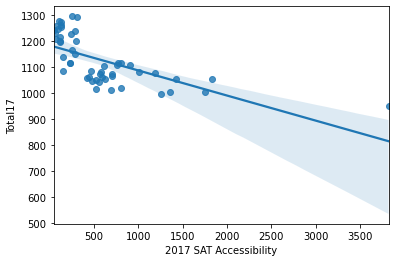

In [55]:
ax = sns.regplot(x="2017 SAT Accessibility", y="Total17", data=sat_17_18_19_access)

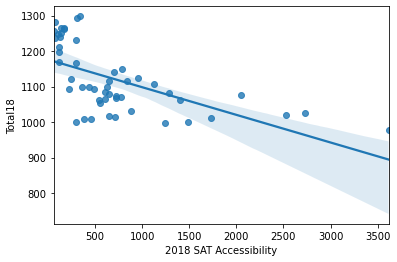

In [56]:
ax = sns.regplot(x="2018 SAT Accessibility", y="Total18", data=sat_17_18_19_access)

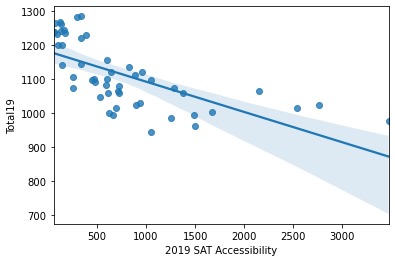

In [57]:
ax = sns.regplot(x="2019 SAT Accessibility", y="Total19", data=sat_17_18_19_access)

### Bar Chart

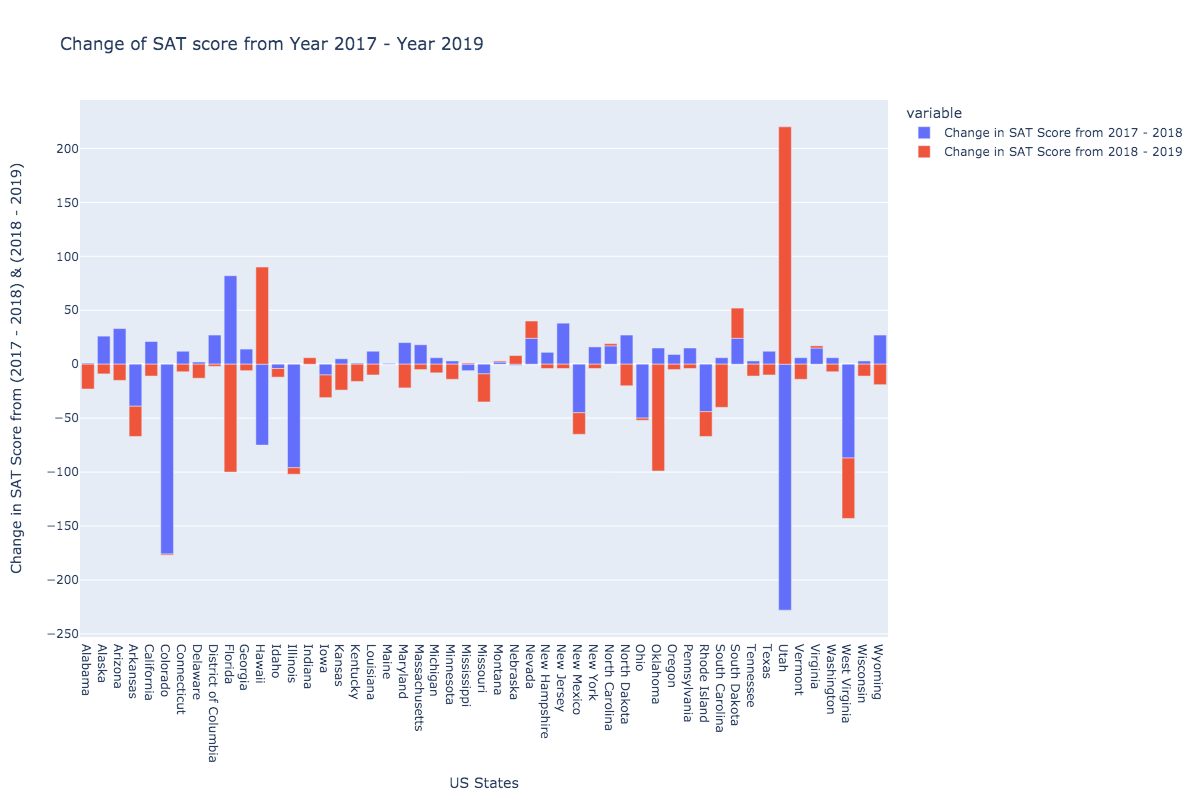

<Figure size 7200x1440 with 0 Axes>

In [58]:
plt.figure(figsize=(100,20))
fig = px.bar(sat_17_18_19_access, x="State", y= ['Change in SAT Score from 2017 - 2018','Change in SAT Score from 2018 - 2019'], labels = {'value':'Change in SAT Score from (2017 - 2018) & (2018 - 2019)', 'State': 'US States'},
             height=800, width=1200, title='Change of SAT score from Year 2017 - Year 2019')
fig.show('png');

### Geographical Map Plot/Choropleth

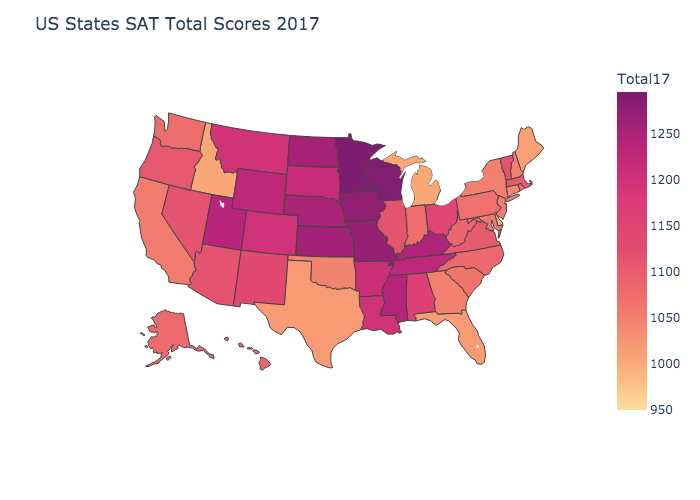

In [59]:
statecode_2017 = sat_17_18_19_access['State Code']
fig = px.choropleth(sat_17_18_19_access,  # Input Pandas DataFrame
                    locations=('State Code'),  # DataFrame column with locations
                    color="Total17",  # DataFrame column with color values
                    hover_name="Total17", # DataFrame column hover info
                    color_continuous_scale = 'sunsetdark', # Colour of choropleth
                    locationmode = 'USA-states') # Set to plot as US States 
fig.update_layout(
    title_text = 'US States SAT Total Scores 2017', # Create a Title
    geo_scope='usa', # Plot only the USA instead of globe
)
fig.show('png');  

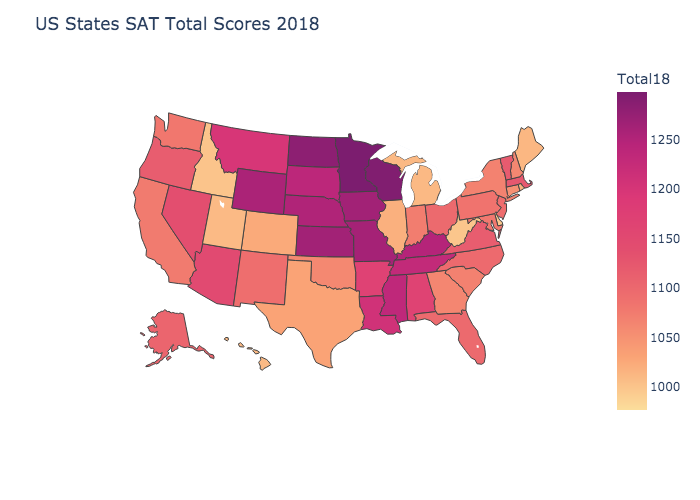

In [60]:
fig = px.choropleth(sat_17_18_19_access,  # Input Pandas DataFrame
                    locations="State Code",  # DataFrame column with locations
                    color="Total18",  # DataFrame column with color values
                    hover_name="Total18", # DataFrame column hover info
                    color_continuous_scale = 'sunsetdark', # Colour of choropleth
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'US States SAT Total Scores 2018', # Create a Title
    geo_scope='usa', # Plot only the USA instead of globe
)
fig.show('png');  

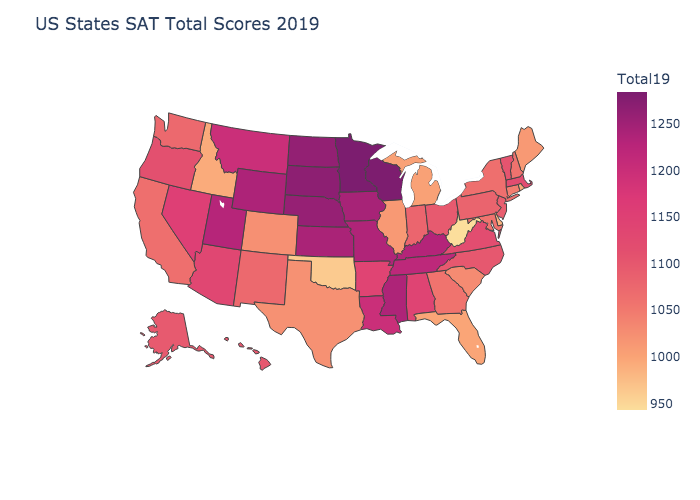

In [61]:
fig = px.choropleth(sat_17_18_19_access,  # Input Pandas DataFrame
                    locations="State Code",  # DataFrame column with locations
                    color="Total19",  # DataFrame column with color values
                    hover_name="Total19", # DataFrame column hover info
                    color_continuous_scale = 'sunsetdark', # Colour of choropleth
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'US States SAT Total Scores 2019', # Create a Title
    geo_scope='usa', # Plot only the USA instead of globe
)
fig.show('png');  

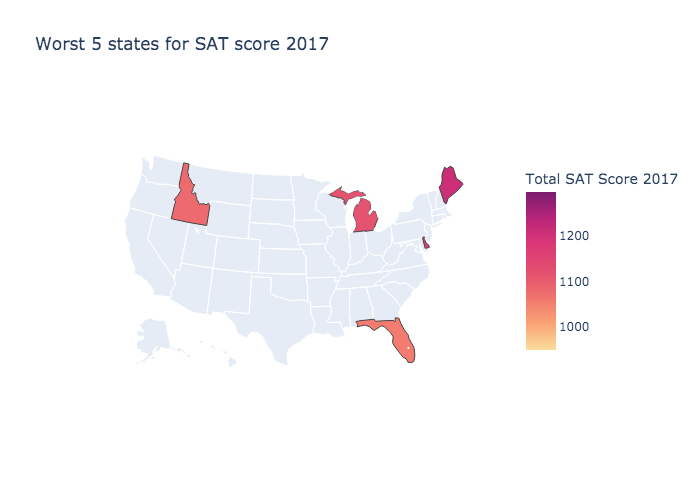

In [62]:
import plotly.graph_objs as gobj

data = dict(type = 'choropleth',
            locations = ['DE', 'ID', 'MI', 'ME', 'FL'],
            locationmode = 'USA-states',
            colorscale= 'sunsetdark',
            text= ['Delaware', 'Idaho', 'Michigan', 'Maine', 'Florida'],
            z=sat_17_18_19_access['Total17'],
            colorbar = {'title':'Total SAT Score 2017', 'len':200,'lenmode':'pixels' })

layout = dict(geo = {'scope':'usa'}, title = 'Worst 5 states for SAT score 2017')
col_map = gobj.Figure(data = [data],layout = layout)
col_map.show('png');

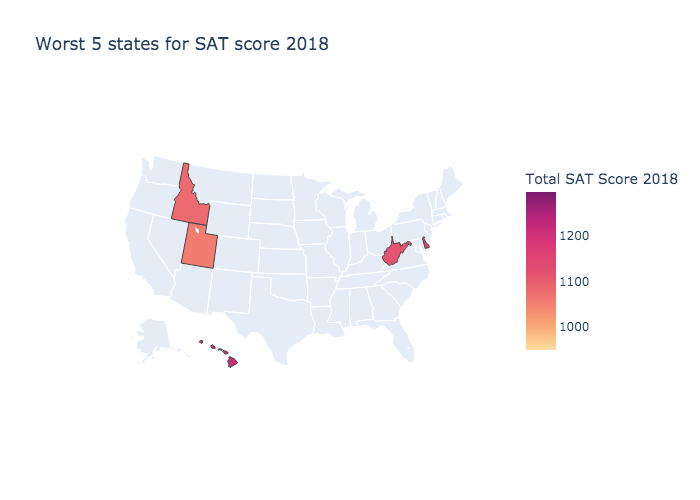

In [63]:
import plotly.graph_objs as gobj

data = dict(type = 'choropleth',
            locations = ['DE', 'ID', 'WV', 'HI', 'UT'],
            locationmode = 'USA-states',
            colorscale= 'sunsetdark',
            text= ['Delaware', 'Idaho', 'West Virginia', 'Hawaii','Utah'],
            z=sat_17_18_19_access['Total17'],
            colorbar = {'title':'Total SAT Score 2018', 'len':200,'lenmode':'pixels' })

layout = dict(geo = {'scope':'usa'}, title = 'Worst 5 states for SAT score 2018')
col_map = gobj.Figure(data = [data],layout = layout)
col_map.show('png');

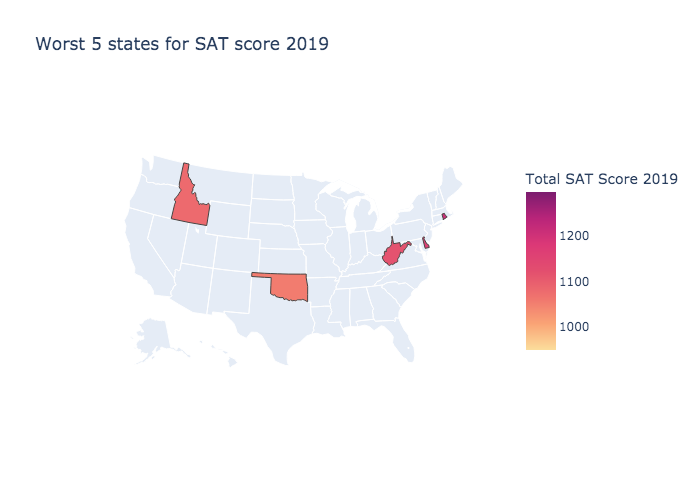

In [64]:
import plotly.graph_objs as gobj

data = dict(type = 'choropleth',
            locations = ['DE', 'ID', 'WV', 'RI', 'OK'],
            locationmode = 'USA-states',
            colorscale= 'sunsetdark',
            text= ['Delaware', 'Idaho', 'West Virginia', 'Rhode Island','Oklahoma'],
            z=sat_17_18_19_access['Total17'],
            colorbar = {'title':'Total SAT Score 2019', 'len':200,'lenmode':'pixels' })

layout = dict(geo = {'scope':'usa'}, title = 'Worst 5 states for SAT score 2019')
col_map = gobj.Figure(data = [data],layout = layout)
col_map.show('png');

## Conclusions and Recommendations

Based on our exploration of the data, we can conclude that income do play a part in affecting the ACT test score. High income families do have the capability in affording more or better prep courses, etc. However, that is not the case for SAT. Accessibilty of test centers does not matter for ACT but does have a very weak relationship for SAT. The high accessibility values are from outliers, hence there isn't a firm conclusion. 


It will be recommended for students to take SAT exams for standardize testing as there is no bias to income. There is no need to build additional test centers as well since it does not improve test scores.  


Further research into other factors, eg. what did states which improved do to increase score, number of prep centers, number of hours each students took to prepare, etc has to be done. 
